런타임 유형변경 >> CPU

In [0]:
# 구글 드라이브와 Colab 연동
from google.colab import drive
drive.mount('/content/drive') # 출력되는 URL에 접속하여 verification code 복사 및 붙여넣기

In [0]:
# 작업할 공간 설정
import os
os.getcwd() # 현재 path 확인

In [0]:
os.chdir('/content/drive/My Drive/PyConKorea2019-Tutorials/LRP') # 작업할 path를 google drive로 이동
os.getcwd()

In [0]:
!pip install innvestigate

### 1. 전처리 (base code :  https://cyc1am3n.github.io/2018/11/10/classifying_korean_movie_review.html)

In [0]:
# import json
# import os
# import nltk
# import pickle
# import numpy as np
# from pprint import pprint

# if os.path.isfile('nsmc/train_docs_han.json'):
#     with open('nsmc/train_docs_han.json') as f:
#         train_docs = json.load(f)
#     with open('nsmc/test_docs_han.json') as f:
#         test_docs = json.load(f) 

# else:
#     train_docs = [(tokenize(row[1]), row[2]) for row in train_data] #row[1]은 문장, row[2]는 클래스
#     test_docs = [(tokenize(row[1]), row[2]) for row in test_data]

#     with open('nsmc/train_docs.json', 'w', encoding="utf-8") as make_file:
#         json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
#     with open('nsmc/test_docs.json', 'w', encoding="utf-8") as make_file:
#         json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

# pprint(train_docs[0])

In [0]:
# tokens = [t for d in train_docs for t in d[0]]
# print(len(tokens))

# text = nltk.Text(tokens, name='NMSC')
# print(text)

# train_y = [c for _, c in train_docs]
# test_y = [c for _, c in test_docs]

In [0]:
# import pickle
# import numpy as np
# #load 
# with open("nsmc/train_y.txt", "wb") as fp:
#     pickle.dump(train_y, fp)
# with open("nsmc/test_y.txt", "wb") as fp:
#     pickle.dump(test_y, fp)

In [0]:
# # 전체 토큰의 개수
# print(len(text.tokens))

# # 중복을 제외한 토큰의 개수
# print(len(set(text.tokens)))            

# # 출현 빈도가 높은 상위 토큰 10개
# pprint(text.vocab().most_common(10))

In [0]:
# selected_words_10000 = [f[0] for f in text.vocab().most_common(10000)]

# #train data
# train_x_common_10000 = []
# for i in range(len(train_docs)):
#     _ = []
#     for word in train_docs[i][0] :
#         try : 
#             _.append(selected_words_10000.index(word))
#         except :
#             _.append(10000)
#     train_x_common_10000.append(_)
    
# #test data
# test_x_common_10000 = []
# for i in range(len(test_docs)):
#     _ = []
#     for word in test_docs[i][0] :
#         try : 
#             _.append(selected_words_10000.index(word))
#         except :
#             _.append(10000)
#     test_x_common_10000.append(_)



# # Save 
# x_train = np.asarray(train_x).astype('float32')
# x_test = np.asarray(test_x).astype('float32')

# y_train = np.asarray(train_y).astype('float32')
# y_test = np.asarray(test_y).astype('float32')
    
# with open("selected_words_10000.txt", "wb") as fp:
#     pickle.dump(selected_words_10000, fp)    

In [0]:
import pickle
import numpy as np
#load 
with open("nsmc/nsmc_train_x.txt", "rb") as fp:
    X_train = pickle.load(fp)
with open("nsmc/nsmc_test_x.txt", "rb") as fp:
    X_test = pickle.load(fp)
with open("nsmc/nsmc_train_y.txt", "rb") as fp:
    train_y = pickle.load(fp)
with open("nsmc/nsmc_test_y.txt", "rb") as fp:
    test_y = pickle.load(fp)
with open("nsmc/nsmc_selected_words.txt", "rb") as fp:
    selected_words_10000 = pickle.load(fp) 


### 2. LSTM 훈련

In [0]:
import numpy as np
import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.models import Model, load_model

import matplotlib.pyplot as plt
from IPython.display import display, HTML

from numpy import newaxis as na

Using TensorFlow backend.


In [0]:
max_features = 10000
maxlen = 100
batch_size = 1024

In [0]:
# One-hot encoding the output >> 
num_classes = 2
y_train = keras.utils.to_categorical(train_y, num_classes)
y_test = keras.utils.to_categorical(test_y, num_classes)

In [0]:
print('훈련 데이터: {}'.format(len(X_train)))
print('테스트 데이터: {}'.format(len(X_test)))
print('카테고리: {}'.format(num_classes))

훈련 데이터: 150000
테스트 데이터: 50000
카테고리: 2


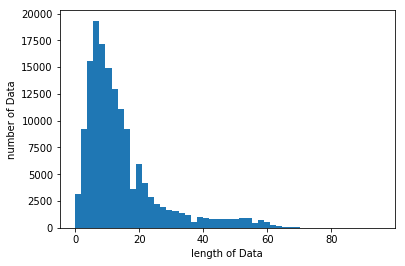

In [0]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
maxlen = 30
x_train = sequence.pad_sequences(X_train, maxlen)
x_test = sequence.pad_sequences(X_test, maxlen)

In [0]:
y_train[0]

array([1., 0.], dtype=float32)

In [0]:
model = Sequential()
model.add(Embedding(max_features, 64)) #embedding size보다 1은 커야함
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2)

W0812 01:47:16.506520 140275144341376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 01:47:16.550173 140275144341376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 01:47:16.560006 140275144341376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 01:47:16.836024 140275144341376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0812 01:47:16.846986 

Train...
Epoch 1/10
150000/150000 [==============================] - 49s 325us/step - loss: 0.4864 - acc: 0.7661
Epoch 2/10
150000/150000 [==============================] - 45s 298us/step - loss: 0.3329 - acc: 0.8575
Epoch 3/10
150000/150000 [==============================] - 46s 308us/step - loss: 0.3091 - acc: 0.8676
Epoch 4/10
150000/150000 [==============================] - 45s 302us/step - loss: 0.2949 - acc: 0.8726
Epoch 5/10
150000/150000 [==============================] - 46s 305us/step - loss: 0.2811 - acc: 0.8779
Epoch 6/10
150000/150000 [==============================] - 46s 304us/step - loss: 0.2679 - acc: 0.8832
Epoch 7/10
150000/150000 [==============================] - 45s 301us/step - loss: 0.2547 - acc: 0.8889
Epoch 8/10
150000/150000 [==============================] - 51s 339us/step - loss: 0.2450 - acc: 0.8931
Epoch 9/10
150000/150000 [==============================] - 45s 301us/step - loss: 0.2319 - acc: 0.8985
Epoch 10/10
150000/150000 [============================

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 673,154
Trainable params: 673,154
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.save('lstm.h5') 

In [0]:
results = model.evaluate(x_test, y_test)

50000/50000 [==============================] - 8s 167us/step


In [0]:
results

[0.4237879145002365, 0.83947]

### 3. LRP & Visualization (base code : https://github.com/ArrasL/LRP_for_LSTM)

In [0]:
def html_heatmap (words, scores, cmap_name="bwr"):
    """
    Return word-level heatmap in HTML format,
    with words being the list of words (as string),
    scores the corresponding list of word-level relevance values,
    and cmap_name the name of the matplotlib diverging colormap.
    """
    
    colormap  = plt.get_cmap(cmap_name)
     
    #assert len(words)==len(scores)
    max_s     = max(scores)
    min_s     = min(scores)
    
    output_text = ""
    
    for idx, w in enumerate(words):
        score       = rescale_score_by_abs(scores[idx], max_s, min_s)
        output_text = output_text + span_word(w, score, colormap) + " "
    
    return output_text + "\n"

def rescale_score_by_abs (score, max_score, min_score):
    """
    Normalize the relevance value (=score), accordingly to the extremal relevance values (max_score and min_score), 
    for visualization with a diverging colormap.
    i.e. rescale positive relevance to the range [0.5, 1.0], and negative relevance to the range [0.0, 0.5],
    using the highest absolute relevance for linear interpolation.
    """
    
    # CASE 1: positive AND negative scores occur --------------------
    if max_score>0 and min_score<0:
    
        if max_score >= abs(min_score):   # deepest color is positive
            if score>=0:
                return 0.5 + 0.5*(score/max_score)
            else:
                return 0.5 - 0.5*(abs(score)/max_score)

        else:                             # deepest color is negative
            if score>=0:
                return 0.5 + 0.5*(score/abs(min_score))
            else:
                return 0.5 - 0.5*(score/min_score)   
    
    # CASE 2: ONLY positive scores occur -----------------------------       
    elif max_score>0 and min_score>=0: 
        if max_score == min_score:
            return 1.0
        else:
            return 0.5 + 0.5*(score/max_score)
    
    # CASE 3: ONLY negative scores occur -----------------------------
    elif max_score<=0 and min_score<0: 
        if max_score == min_score:
            return 0.0
        else:
            return 0.5 - 0.5*(score/min_score)
          

def getRGB (c_tuple):
    return "#%02x%02x%02x"%(int(c_tuple[0]*255), int(c_tuple[1]*255), int(c_tuple[2]*255))

     
def span_word (word, score, colormap):
    return "<span style=\"background-color:"+getRGB(colormap(score))+"\">"+word+"</span>"

In [0]:
def get_layer_output(layer_name, data):
    # https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer
    intermediate_layer_model = keras.Model(inputs=model.input,
                                     outputs=model.get_layer(layer_name).output)
    return intermediate_layer_model.predict(data)  

In [0]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    if name == 'lstm_1/kernel:0':
        kernel_0 = weight
    if name == 'lstm_1/recurrent_kernel:0':
        recurrent_kernel_0 = weight
    if name == 'lstm_1/bias:0':
        bias_0 = weight
    elif name == 'dense_1/kernel:0':
        output = weight

In [0]:
print("kernel_0", kernel_0.shape)
print("recurrent_kernel_0", recurrent_kernel_0.shape)
print("bias_0", bias_0.shape)
print("output", output.shape)

# self.Wxh_Left (240, 60)
# self.Whh_Left (240, 60)
# self.bxh_Left (240,)
# self.Why_Left (5, 60)

kernel_0 (64, 256)
recurrent_kernel_0 (64, 256)
bias_0 (256,)
output (64, 2)


In [0]:
Wxh = kernel_0  # shape 4d*e
Whh = recurrent_kernel_0  # shape 4d
bxh = bias_0  # shape 4d 
Why = output

print("Wxh", Wxh.shape)
print("Whh", Whh.shape)
print("bxh", bxh.shape)
print("Why", Why.shape)

Wxh (64, 256)
Whh (64, 256)
bxh (256,)
Why (64, 2)


In [0]:
def lrp_linear(hin, w, b, hout, Rout, bias_nb_units, eps, bias_factor=0.0, debug=False):
    """
    LRP for a linear layer with input dim D and output dim M.
    Args:
    - hin:            forward pass input, of shape (D,)
    - w:              connection weights, of shape (D, M)
    - b:              biases, of shape (M,)
    - hout:           forward pass output, of shape (M,) (unequal to np.dot(w.T,hin)+b if more than one incoming layer!)
    - Rout:           relevance at layer output, of shape (M,)
    - bias_nb_units:  total number of connected lower-layer units (onto which the bias/stabilizer contribution is redistributed for sanity check)
    - eps:            stabilizer (small positive number)
    - bias_factor:    set to 1.0 to check global relevance conservation, otherwise use 0.0 to ignore bias/stabilizer redistribution (recommended)
    Returns:
    - Rin:            relevance at layer input, of shape (D,)
    """
    sign_out = np.where(hout[na,:]>=0, 1., -1.) # shape (1, M)
    numer    = (hin[:,na] * w) + ( bias_factor * (b[na,:]*1. + eps*sign_out*1.) / bias_nb_units ) # shape (D, M)
    denom    = hout[na,:] + (eps*sign_out*1.)   # shape (1, M)
    message  = (numer/denom) * Rout[na,:]       # shape (D, M)
    
    Rin      = message.sum(axis=1)              # shape (D,)
    
    if debug:
        print("local diff: ", Rout.sum() - Rin.sum())

    return Rin

In [0]:
def LRP(target_data, target_class) :
    
    #원본 소스에서 E embedding은 전체에 대한 단어 사전이고, x는 embedding된 인풋이다.  
    # w_indices [109, 11995, 25, 18263, 25, 973, 3138, 6389, 372]

    x = get_layer_output('embedding_1', target_data).squeeze(axis=1)
    e = x.shape[1]

   ################# forword
    T = target_data.shape[0]
    d = int(256/4)  # hidden units
    C = Why.shape[1] # number of classes
    
    idx    = np.hstack((np.arange(0,d), np.arange(2*d,4*d))).astype(int) # indices of gates i,f,o together
    idx_i, idx_g, idx_f, idx_o = np.arange(0,d), np.arange(d,2*d), np.arange(2*d,3*d), np.arange(3*d,4*d) # indices of gates i,g,f,o separately

    h  = np.zeros((T,d))
    c  = np.zeros((T,d))

    gates_xh  = np.zeros((T, 4*d))  
    gates_hh  = np.zeros((T, 4*d)) 
    gates_pre = np.zeros((T, 4*d))  
    gates     = np.zeros((T, 4*d))  

    for t in range(T):
        gates_xh[t]     = np.dot(Wxh.T, x[t])
        gates_hh[t]     = np.dot(Whh.T, h[t-1])
        gates_pre[t]    = gates_xh[t] + gates_hh[t] + bxh
        gates[t, idx]    = 1.0/(1.0 + np.exp(- gates_pre[t,idx]))
        gates[t,idx_g]  = np.tanh(gates_pre[t,idx_g]) 
        c[t]            = gates[t,idx_f]*c[t-1] + gates[t,idx_i]*gates[t,idx_g]
        h[t]            = gates[t,idx_o]*np.tanh(c[t])

    s = np.dot(Why.T, h[t])    

    ################# backwork
    dx     = np.zeros(x.shape)

    dh          = np.zeros((T, d))
    dc          = np.zeros((T, d))
    dgates_pre  = np.zeros((T, 4*d))  # gates pre-activation
    dgates      = np.zeros((T, 4*d))  # gates activation

    ds               = np.zeros((C))
    ds[target_class] = 1.0
    dy               = ds.copy()

    #맨처음을 0으로 시작하지 않게 위한조치
    dh[T-1]     = np.dot(Why, dy)

    for t in reversed(range(T)): 
        dgates[t,idx_o]    = dh[t] * np.tanh(c[t])  # do[t]
        dc[t]             += dh[t] * gates[t,idx_o] * (1.-(np.tanh(c[t]))**2) # dc[t]
        dgates[t,idx_f]    = dc[t] * c[t-1]         # df[t]
        dc[t-1]            = dc[t] * gates[t,idx_f] # dc[t-1]
        dgates[t,idx_i]    = dc[t] * gates[t,idx_g] # di[t]
        dgates[t,idx_g]    = dc[t] * gates[t,idx_i] # dg[t]
        dgates_pre[t,idx]  = dgates[t,idx] * gates[t,idx] * (1.0 - gates[t,idx]) # d ifo pre[t]
        dgates_pre[t,idx_g]= dgates[t,idx_g] *  (1.-(gates[t,idx_g])**2) # d g pre[t]
        dh[t-1]            = np.dot(Whh, dgates_pre[t])
        dx[t]              = np.dot(Wxh, dgates_pre[t])

    ################# LRP
    eps=0.001 
    bias_factor=0.0
    Rx  = np.zeros(x.shape)
    Rh  = np.zeros((T+1, d))
    Rc  = np.zeros((T+1, d))
    Rg  = np.zeros((T,   d)) # gate g only

    Rout_mask            = np.zeros((C))
    Rout_mask[target_class] = 1.0  

    # format reminder: lrp_linear(hin, w, b, hout, Rout, bias_nb_units, eps, bias_factor)
    Rh[T-1]  = lrp_linear(h[T-1], Why, np.zeros((C)), s, s*Rout_mask, 2*d, eps, bias_factor, debug=False)  

    for t in reversed(range(T)):
        print("gates[t,idx_f]*c[t-1],",gates[t,idx_f]*c[t-1].shape)
        print("gates[t,idx_i]*gates[t,idx_g]",gates[t,idx_i]*gates[t,idx_g].shape)
        print("h[T-1]",h[T-1].shape)
        print("x[t]",x[t].shape)
        Rc[t]   += Rh[t]
        Rc[t-1]  = lrp_linear(gates[t,idx_f]*c[t-1], np.identity(d), np.zeros((d)), c[t], Rc[t], 2*d, eps, bias_factor, debug=False)
        Rg[t]    = lrp_linear(gates[t,idx_i]*gates[t,idx_g], np.identity(d), np.zeros((d)), c[t], Rc[t], 2*d, eps, bias_factor, debug=False)
        Rx[t]    = lrp_linear(x[t], Wxh[idx_g], bxh[idx_g], gates_pre[t,idx_g], Rg[t], d+e, eps, bias_factor, debug=False)
        Rh[t-1]  = lrp_linear(h[t-1], Whh[idx_g], bxh[idx_g], gates_pre[t,idx_g], Rg[t], d+e, eps, bias_factor, debug=False)    

    return s, dx, Rx, Rh[-1].sum()

In [0]:
def index_to_word(list):
    _ = []
    for x in list :
        _.append(selected_words_10000[x].split('/')[0])
    return _

In [0]:
def int_to_str(target_class):
    if target_class == 0 :
        return "부정"
    else :
        return "긍정"

In [0]:
predictions = model.predict(x_test)

In [0]:
positive_list = []
negative_list = []

for i in range(len(y_test)):
    if np.argmax(predictions[i]) == 1:
        positive_list.append(i)
    else :
        negative_list.append(i)

In [0]:
#selected_words_10000.append(selected_words_10000[-1])

In [0]:
print("각 단어가 긍정이라고 예측하는데 영향을 미치는 정도" )
for index, i in enumerate(positive_list):
    
    target_full_data = x_test[i]
    squeeze_index = np.transpose(np.nonzero(target_full_data)).squeeze(axis=1)

    target_data = np.array(target_full_data[squeeze_index])
    target_class = np.argmax(y_test[i])

    scores, Gx, Rx, R_rest = LRP(target_data, target_class)

    R_words          = np.sum(Rx, axis=1)                       # compute word-level LRP relevances
    
    
    R_words_SA       = (np.linalg.norm(Gx,ord=2, axis=0))**2   # compute word-level Sensitivity Analysis relevances
    R_words_GI       = np.dot(target_data, Gx) 

    words = index_to_word(target_data)

    if len(words) > 0 :
        print(" 예측 레이블:", int_to_str(np.argmax(predictions[i])), "| 실제 레이블 : ", int_to_str(target_class))

        print("        LRP heatmap:")
        display(HTML(html_heatmap(words, R_words)))

        print("        SA heatmap:")
        display(HTML(html_heatmap(words, R_words_SA)))

        print("        GI heatmap:")
        display(HTML(html_heatmap(words, R_words_GI)))

        print("-----------------------------------------------------------")

    if index == 20: # 50개만 출력
      break

각 단어가 긍정이라고 예측하는데 영향을 미치는 정도
gates[t,idx_f]*c[t-1], [32.43477416 34.11802459 31.95602827 32.59127186 31.56421784 34.08392178
 29.1779946  25.92206883 32.71766237 33.05716962 27.64401921 35.00184965
 32.12492425 31.73841638 26.23886833 30.46675771 29.86564097 31.10416144
 31.77091261 32.70106766 31.12399924 34.88045275 27.05372544 38.96504109
 26.79443585 33.31779794 30.36203396 34.30087779 33.02871724 28.69263961
 30.9801979  35.98913839 35.22221895 31.18008402 34.08530954 31.55567501
 27.86726366 32.01609506 31.35758653 28.92248125 36.85230347 32.19655969
 32.9190286  27.73241259 28.69127411 30.31522855 26.17192305 29.86087693
 27.08406542 34.85774126 31.34296374 31.29120937 35.79117904 31.36155123
 31.80985493 32.71405412 30.18843317 30.43606527 34.21991497 36.42778389
 30.18859722 35.55377792 31.3430472  30.89230854]
gates[t,idx_i]*gates[t,idx_g] [37.32598458 38.3538905  35.40537847 33.73940399 38.33659347 36.8959718
 37.81609017 30.28197748 35.89136337 32.87782001 36.40663276 41.34

IndexError: ignored

In [0]:
print("각 단어가 부정정이라고 예측하는데 영향을 미치는 정도" )
for index, i in enumerate(negative_list):
    
    target_full_data = x_test[i]
    squeeze_index = np.transpose(np.nonzero(target_full_data)).squeeze(axis=1)
    print(squeeze_index)

    target_data = np.array(target_full_data[squeeze_index])
    print("target_data",target_data.shape)
    target_class = np.argmax(y_test[i])

    scores, Gx, Rx, R_rest = LRP(target_data, target_class)

    R_words             = np.sum(Rx, axis=1)                    # compute word-level LRP relevances
    
    R_words_SA       = (np.linalg.norm(Gx, ord=2, axis=0))**2   # compute word-level Sensitivity Analysis relevances
    
    R_words_GI       = np.dot(target_data, Gx) 

    words = index_to_word(target_data)

    if len(words) > 0 :
        print(" 예측 레이블:", int_to_str(np.argmax(predictions[i])), "| 실제 레이블 : ", int_to_str(target_class))

        print("        LRP heatmap:")
        display(HTML(html_heatmap(words, R_words)))

        print("        SA heatmap:")
        display(HTML(html_heatmap(words, R_words_SA)))

        print("        GI heatmap:")
        display(HTML(html_heatmap(words, R_words_GI)))

        print("-----------------------------------------------------------")

    if index == 20: # 50개만 출력
      break